In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Satish Patil\OneDrive\Desktop\BIA\Machine Learning\Projects\Supervised - Regression\Predicting the miles per gallon (mpg) of cars\car.csv")

In [3]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### let's see the meaning of the columns of the data
#### mpg - Milieage/Miles Per Galon
####  cylinders - the power unit of the car where gasoline is turned into power
####  displacement - engine displacement of the car
####  horsepower - rate of the engine performance
####  weight - the weight of a car
####  acceleration - the acceleration of a car
####  model_year - model of the car
####  origin - the origin of the car 
####  name - the name of the car

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
data = data.drop('name',axis=1)

In [7]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [8]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [9]:
data = data.dropna()

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [12]:
data['origin']=data['origin'].map({'usa':1, 'japan':2,'europe':3})

In [13]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


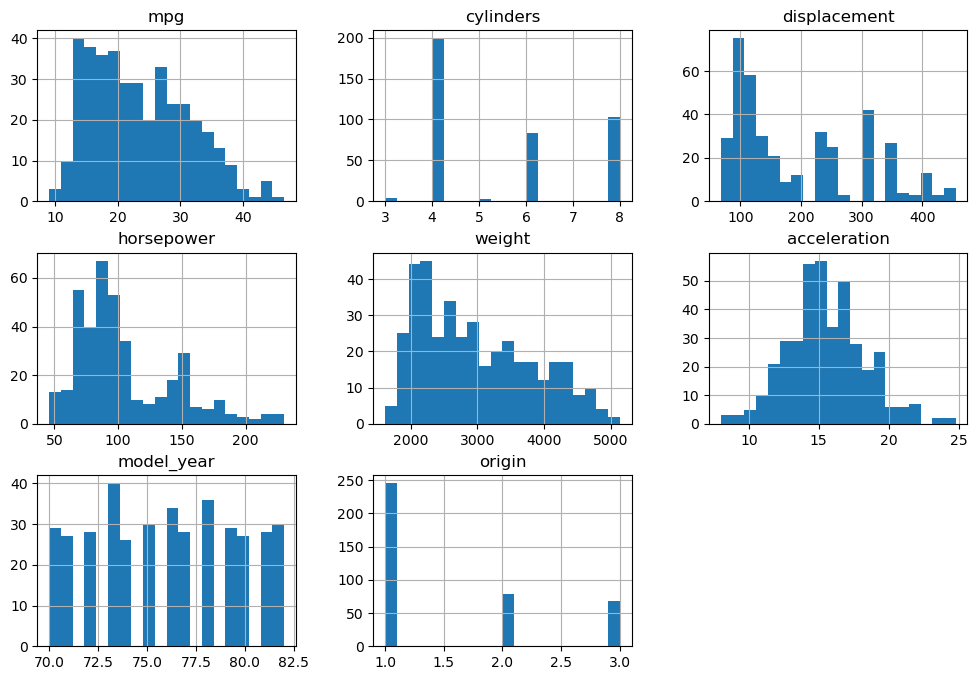

In [14]:
data.hist(figsize=(12,8),bins=20)
plt.show()

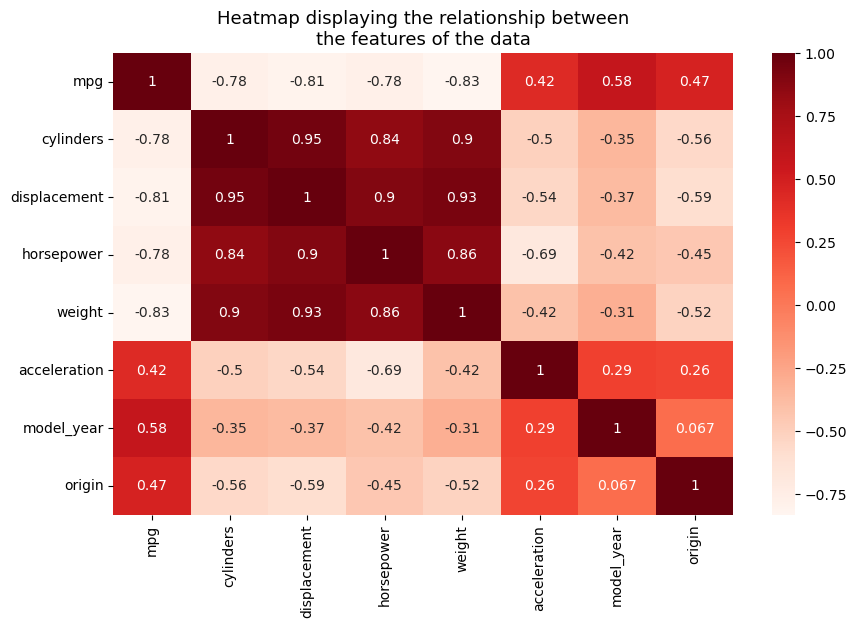

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',fontsize=13)
plt.show()

In [16]:
X = data.drop('mpg', axis = 1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data

,Feature,VIF
0,cylinders,117.002290
1,displacement,99.869333
2,horsepower,66.048090
3,weight,137.593142
4,acceleration,70.617268
5,model_year,110.556329
6,origin,8.072556


#### We can also check for multicollinearity using the variance inflation factor (VIF). A VIF > 5 suggests multicollinearity

In [18]:
X1 = sm.tools.add_constant(data) 
series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])], index=X1.columns)
series1

const           839.761379
mpg               5.541199
cylinders        10.698645
displacement     22.803502
horsepower        9.640589
weight           14.051992
acceleration      2.630344
model_year        2.066282
origin            1.805925
dtype: float64

In [40]:
newdata = data.drop(['cylinders','displacement','weight'],axis=1)

In [42]:
X2 = sm.tools.add_constant(newdata) 
series1 = pd.Series([variance_inflation_factor(X2.values,i) for i in range(X2.shape[1])], index=X2.columns)
series1

const           757.590389
mpg               3.858748
horsepower        4.340756
acceleration      2.069711
model_year        1.681410
origin            1.434689
dtype: float64

In [48]:
X = newdata.drop('mpg', axis = 1)
y = newdata['mpg']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.2, random_state = 42)

In [52]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Linear Regression

In [54]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)

In [58]:
print('Train score: {}\n'.format(model.score(X_train,y_train)))
print('Test score: {}\n'.format(model.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,y_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,y_pred)))

Train score: 0.736173805584293

Test score: 0.7214926829555528

Overall model accuracy: 0.7214926829555528

Mean Squared Error: 17.159368349910316


### Ridge Regression

In [62]:
ridge = Ridge(alpha=.01)
ridge.fit(X_train,y_train) 

Ridge(alpha=0.01)

In [64]:
ridge_pred = ridge.predict(X_test)

In [66]:
print('Train score: {}\n'.format(ridge.score(X_train,y_train)))
print('Test score: {}\n'.format(ridge.score(X_test,y_test)))
print('Overall model accuracy: {}\n'.format(r2_score(y_test,ridge_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test,ridge_pred)))

Train score: 0.7361737772264718

Test score: 0.7215423001337686

Overall model accuracy: 0.7215423001337686

Mean Squared Error: 17.15631134068512


In [68]:
ridge_model = Ridge()

In [70]:
param = {'alpha':[0,0.1,0.01,0.001,1]}

In [72]:
ridge_search = GridSearchCV(ridge_model,param,cv=5,n_jobs=-1)
ridge_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1]})

In [74]:
print('Best parameter found:\n{}'.format(ridge_search.best_params_))
print('Train score: {}\n'.format(ridge_search.score(X_train,y_train)))
print('Test score: {}'.format(ridge_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 1}
Train score: 0.7359116158387159

Test score: 0.7259488617796247


### Lasso Regression

In [77]:
lasso = Lasso()

In [79]:
param['max_iter'] = [1000,10000,100000,1000000]

In [81]:
lasso_search = GridSearchCV(lasso,param,cv=5,n_jobs=-1)
lasso_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0, 0.1, 0.01, 0.001, 1],
                         'max_iter': [1000, 10000, 100000, 1000000]})

In [83]:
print('Best parameter found:\n{}\n'.format(lasso_search.best_params_))
print('Train score: {}\n'.format(lasso_search.score(X_train,y_train)))
print('Test score: {}'.format(lasso_search.score(X_test,y_test)))

Best parameter found:
{'alpha': 0.01, 'max_iter': 1000}

Train score: 0.7361623940297517

Test score: 0.7221320353163084


### Ensemble methods for the regression

#### No scaling / standardization require for further algorithms 

In [88]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size = 0.2, random_state = 42)

### Decision Tree Regressor

In [90]:
dtree = DecisionTreeRegressor()

In [92]:
params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}

In [94]:
tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)
tree_search.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]})

In [96]:
tree_pred = tree_search.predict(xtest)

print('Best parameter found:\n{}\n'.format(tree_search.best_params_))
print('Train score: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(tree_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,tree_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,tree_pred)))

Best parameter found:
{'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 9}

Train score: 0.7872141683886674

Test score: 0.7489076121076292

Overall model accuracy: 0.7489076121076292

Mean Squared Error: 15.470282143489031


### Random Forest Regressor

In [99]:
forest = RandomForestRegressor()

In [101]:
params['n_estimators'] = [100,200,300,400,500]

In [103]:
forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1, n_iter=50)
forest_search.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [105]:
forest_pred = forest_search.predict(xtest) 

print('Best parameter found:\n{}\n'.format(forest_search.best_params_))
print('Train score: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(forest_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,forest_pred)))
print('Mean Squared Error: {}'.format(mean_squared_error(ytest,forest_pred)))

Best parameter found:
{'n_estimators': 400, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}

Train score: 0.9296742536887568

Test score: 0.7788815051514657

Overall model accuracy: 0.7788815051514657

Mean Squared Error: 13.623533278582473


### Gradient Boosting Regressor

In [108]:
gradient_model = GradientBoostingRegressor()

In [110]:
params['learning_rate'] = [0.05,0.1,0.2,0.3,0.4,0.5]

In [112]:
gradient_search = RandomizedSearchCV(gradient_model,params,cv=5,n_jobs=-1, n_iter=50)  
gradient_search.fit(xtrain,ytrain) 

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.2, 0.3,
                                                          0.4, 0.5],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [114]:
gradient_pred = gradient_search.predict(xtest) 

print('Best parameter found:\n{}\n'.format(gradient_search.best_params_))
print('Train score: {}\n'.format(gradient_search.score(xtrain,ytrain)))
print('Test score: {}\n'.format(gradient_search.score(xtest,ytest)))
print('Overall model accuracy: {}\n'.format(r2_score(ytest,gradient_pred)))
print('Mean Squared Error: {}\n'.format(mean_squared_error(ytest,gradient_pred)))

Best parameter found:
{'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.1}

Train score: 0.9669415552081282

Test score: 0.7752000471413636

Overall model accuracy: 0.7752000471413636

Mean Squared Error: 13.850354946072054



#### we will now try to make predictions and see how well our model predicts


In [117]:
new_newdata = newdata.drop('mpg',axis=1) 
data = pd.DataFrame({'Actual mpg':newdata.mpg.values,'Predicted mpg':gradient_search.predict(new_newdata.values)})

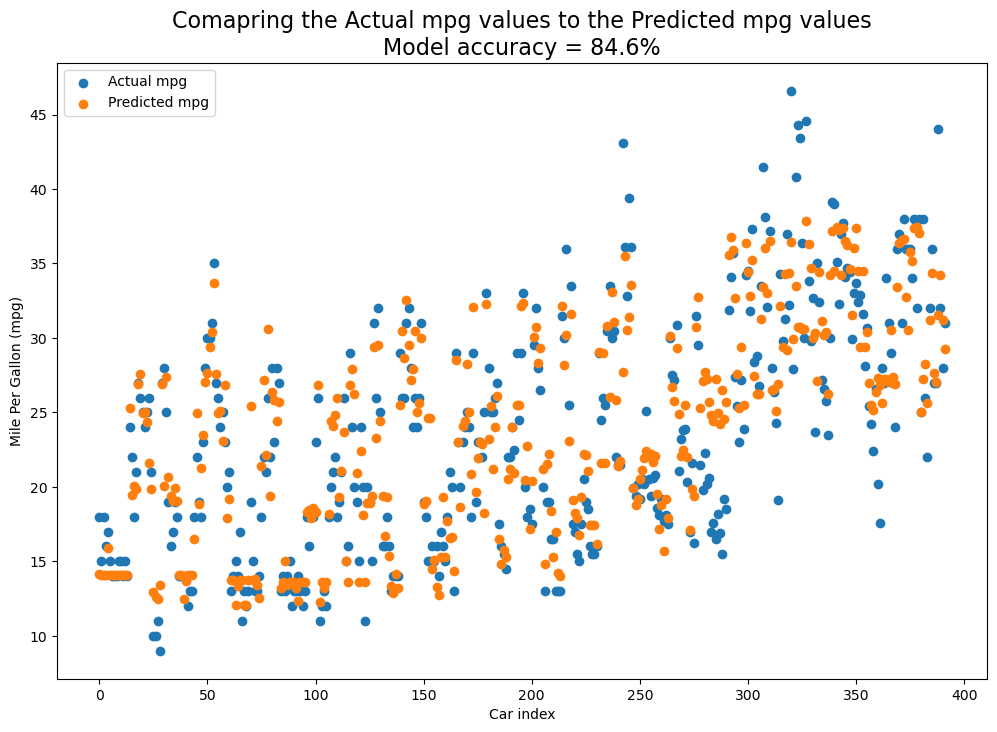

In [119]:
plt.figure(figsize=(12,8))
plt.scatter(data.index,data['Actual mpg'].values,label='Actual mpg')
plt.scatter(data.index,data['Predicted mpg'].values,label='Predicted mpg')
plt.title('Comapring the Actual mpg values to the Predicted mpg values\nModel accuracy = 84.6%',fontsize=16)
plt.xlabel('Car index')
plt.ylabel('Mile Per Gallon (mpg)')
plt.legend(loc='upper left')
plt.show()

In [121]:
data['Residuals'] = data['Actual mpg']-data['Predicted mpg']
data

,Actual mpg,Predicted mpg,Residuals
0,18.0,14.148100,3.851900
1,15.0,14.082706,0.917294
2,18.0,14.082706,3.917294
3,16.0,14.082706,1.917294
4,17.0,15.923325,1.076675
...,...,...,...
387,27.0,27.059597,-0.059597
388,44.0,31.515639,12.484361
389,32.0,34.244896,-2.244896
390,28.0,31.175644,-3.175644
